In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import missingno as msno

In [2]:
data = pd.read_csv("/Users/saudahmad/Desktop/ML/telco.csv")

# Data preprocessing

In [ ]:
# msno.matrix(data)
# plt.show()
# data.info()
# data.describe()
# data.isnull().sum()
# data.nunique()
# pd.set_option('display.max_columns', None)
# data.columns


# Data Encoding

In [4]:

# List of columns to encode
columns_to_encode = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                     'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                     'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 
                     'PaperlessBilling','PaymentMethod']

encoded_data = pd.get_dummies(data, columns= columns_to_encode)

#drop customer id 
encoded_data.drop(columns=['customerID'], inplace=True)

from sklearn.preprocessing import LabelEncoder

#This is to encode the label column 
le = LabelEncoder()

# Fit and transform the data
encoded_data['Churn'] = le.fit_transform(encoded_data['Churn'])

In [5]:
encoded_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.5,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.5,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.9,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.6,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


# Standarization/Normalization 

In [6]:
#These columns contains some empty spaces, the code is used to fill them with 0
for i in encoded_data.index:
    if encoded_data.loc[i,'TotalCharges'] ==   ' ':
        encoded_data.loc[i,'TotalCharges']  =0
    if encoded_data.loc[i,'MonthlyCharges'] == ' ':
        encoded_data.loc[i,'MonthlyCharges']=0
    if encoded_data.loc[i,'tenure'] == ' ':
        encoded_data.loc[i,'tenure'] =0

#This step is to change the three numerical columns datatypes from string to float
encoded_data['MonthlyCharges'] = pd.to_numeric(encoded_data['MonthlyCharges'])
encoded_data['TotalCharges']   = pd.to_numeric(encoded_data['TotalCharges'])
encoded_data['tenure']         = pd.to_numeric(encoded_data['tenure'])
encoded_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [7]:
#Min-Max Scaling  [0, 1].
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data to [0, 1]
scaled_data = scaler.fit_transform(encoded_data[['TotalCharges', 'MonthlyCharges','tenure']])

# Create a new DataFrame with the scaled data
norm_data = pd.DataFrame(scaled_data, columns=['TotalCharges', 'MonthlyCharges','tenure'])

min_max_norm_data = encoded_data.copy()
min_max_norm_data[['TotalCharges', 'MonthlyCharges','tenure']] = norm_data

min_max_norm_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.013889,0.115423,0.003437,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,0.472222,0.385075,0.217564,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,0.027778,0.354229,0.012453,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0.625000,0.239303,0.211951,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,0.027778,0.521891,0.017462,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.333333,0.662189,0.229194,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,1.000000,0.845274,0.847792,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,0.152778,0.112935,0.039892,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,0.055556,0.558706,0.035303,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [8]:
#z-score normalization
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardization
scaler = StandardScaler()
df_standardized = scaler.fit_transform(encoded_data[['TotalCharges', 'MonthlyCharges','tenure']])
df_standardized = pd.DataFrame(df_standardized)
z_score_norm_data = encoded_data.copy()
z_score_norm_data[['TotalCharges', 'MonthlyCharges','tenure']] = df_standardized

z_score_norm_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.992611,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,0.066327,-0.259629,-0.172165,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,-1.236724,-0.362660,-0.958066,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0.514251,-0.746535,-0.193672,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,-1.236724,0.197365,-0.938874,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.340876,0.665992,-0.127605,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,1.613701,1.277533,2.242606,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,-0.870241,-1.168632,-0.852932,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,-1.155283,0.320338,-0.870513,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [9]:
# Robust Scaling
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_robust_scaled = scaler.fit_transform(encoded_data[['TotalCharges', 'MonthlyCharges','tenure']])
df_robust_scaled = pd.DataFrame(df_robust_scaled)

robust_scale_norm_data = encoded_data.copy()
robust_scale_norm_data[['TotalCharges', 'MonthlyCharges','tenure']] = df_robust_scaled
robust_scale_norm_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-0.608696,-0.745170,-0.402798,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,0.108696,-0.246550,0.146087,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,-0.586957,-0.303588,-0.379687,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0.347826,-0.516099,0.131698,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,-0.586957,0.006440,-0.366848,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.108696,0.265869,0.175898,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,0.934783,0.604416,1.761589,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,-0.391304,-0.749770,-0.309352,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,-0.543478,0.074517,-0.321114,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
# #Describe the distribution of total charges
# import seaborn as sns
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 1, 1)
# sns.histplot(encoded_data['TotalCharges'], kde=False, bins=30)
# plt.title('Histogram')


In [ ]:
# #Describe the distribution of monthly charges
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 1, 1)
# sns.histplot(encoded_data['MonthlyCharges'], kde=False, bins=30)
# plt.title('Histogram')


In [ ]:
# #Describe the distribution of tenure

# plt.figure(figsize=(12, 6))
# plt.subplot(1, 1, 1)
# sns.histplot(encoded_data['tenure'], kde=False, bins=30)
# plt.title('Histogram')


In [ ]:
# plt.subplot(2, 2, 2)
# sns.boxplot(x=encoded_data['TotalCharges'])
# plt.title('Box Plot')

In [ ]:

# plt.subplot(2, 2, 2)
# sns.boxplot(x=encoded_data['MonthlyCharges'])
# plt.title('Box Plot')

In [ ]:
# plt.subplot(2, 2, 2)
# sns.boxplot(x=encoded_data['tenure'])
# plt.title('Box Plot')


In [10]:
correlation_matrix1 = min_max_norm_data.corr()
correlation_matrix2 = z_score_norm_data.corr()
correlation_matrix3 = robust_scale_norm_data.corr()

In [12]:
# # Load your dataset
# # Example: df = pd.read_csv('path_to_your_data.csv')
# # Ensure your data is loaded correctly
# # df = pd.read_csv('path_to_your_data.csv')


# # Plot the correlation heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
# plt.title('Correlation Heatmap')
# plt.show()

In [ ]:
# plt.figure(figsize=(8, 6))
# sns.countplot(data=data, x='Churn', palette='viridis')
# plt.title('Distribution of Churn')
# plt.xlabel('Churn')
# plt.ylabel('Count')
# plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
# plt.show()

# Featuring selection using chi-squared, Wrapper, and Random Forest

In [13]:
# Prepare your data
X  = min_max_norm_data.drop('Churn', axis=1)  # Features
X2 = z_score_norm_data.drop('Churn', axis=1)
X3 = robust_scale_norm_data.drop('Churn', axis=1)

y = min_max_norm_data['Churn']

#These are different methods for feature selection 
def chi_feature():
    # chi-squared for categorical features.

    from sklearn.feature_selection import chi2, SelectKBest
    z_score_norm_data
    robust_scale_norm_data

    chi2_selector = SelectKBest(chi2, k='all')
    X_kbest = chi2_selector.fit_transform(X, y)

    # Print scores
    chi2_scores = chi2_selector.scores_
    features = X.columns
    return pd.DataFrame({'Feature': features, 'Score': chi2_scores})

def wrapper_feature():
    #Wrapper Methods
    from sklearn.feature_selection import RFE
    from sklearn.linear_model import LogisticRegression

    # Use a simple estimator
    model = LogisticRegression()

    # Apply RFE
    rfe = RFE(model, n_features_to_select=10)
    rfe = rfe.fit(X, y)

    # Print selected features
    features = X.columns
    return  pd.DataFrame({'Feature': features, 'Ranking': rfe.ranking_})

def random_forest_feature():
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier

    # Fit the model
    model = RandomForestClassifier()
    model.fit(X, y)

    # Get feature importances
    importances = model.feature_importances_
    features = X.columns
    return  pd.DataFrame({'Feature': features, 'Importance': importances})



# Visualization of features

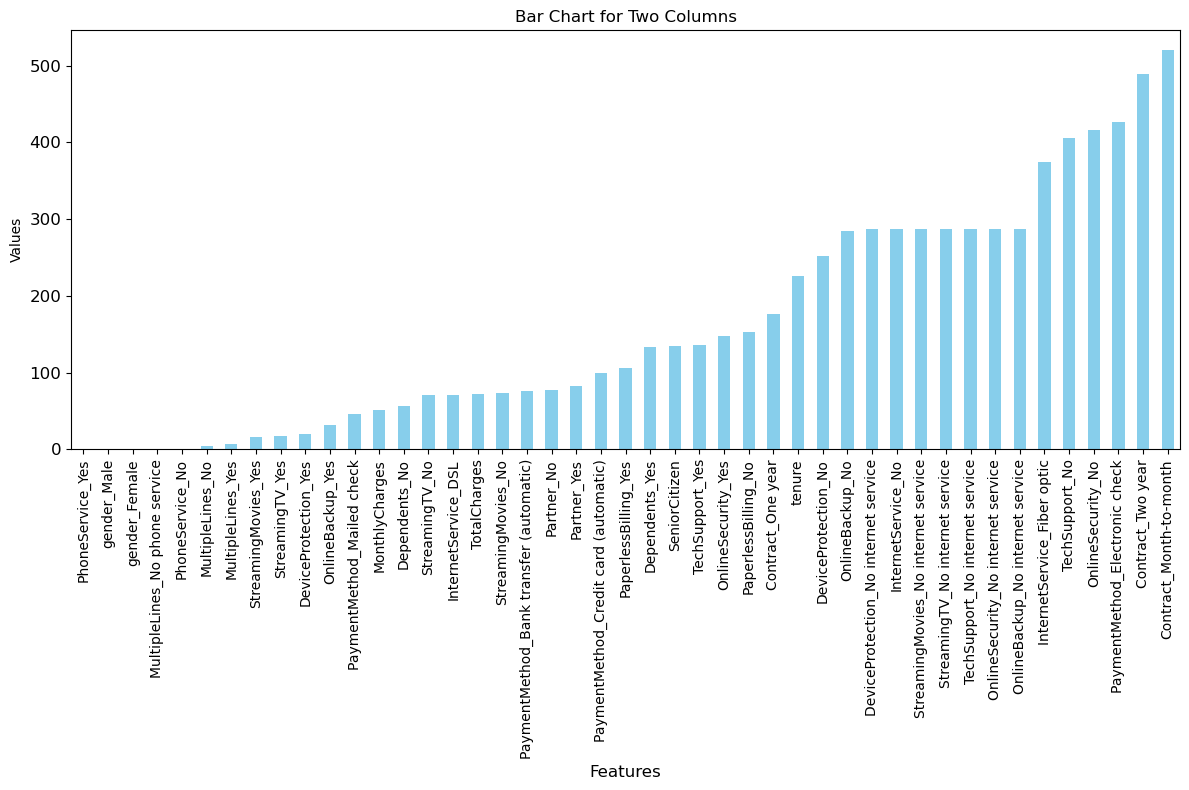

In [102]:
# Sort by 'Score'
feature_scores = chi_feature().sort_values(by='Score')

# Set 'Feature' as the index
feature_scores.set_index(feature_scores['Feature'], inplace=True)

# Plot bar chart
plt.figure(figsize=(12, 8))
feature_scores['Score'].plot(kind='bar', color='skyblue')  # Use 'bar' for bar chart
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels to be vertical and adjust font size
plt.yticks(fontsize=12)
plt.xlabel('Features', fontsize=12)  # Add xlabel if needed
plt.ylabel('Values')
plt.title('Bar Chart for Two Columns')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [ ]:
# Sort by 'Importance'
selected_features = wrapper_feature().sort_values(by='Ranking')

# Set 'Feature' as the index
selected_features.set_index(selected_features['Ranking'], inplace=True)

# Plot bar chart
plt.figure(figsize=(12, 8))
feature_scores['Score'].plot(kind='bar', color='skyblue')  # Use 'bar' for bar chart
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels to be vertical and adjust font size
plt.yticks(fontsize=12)
plt.xlabel('Features', fontsize=12)  # Add xlabel if needed
plt.ylabel('Ranks')
plt.title('Bar Chart for Two Columns')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [ ]:
# Sort by 'Importance'
feature_importances = random_forest_feature().sort_values(by='Importance')

# Set 'Feature' as the index
feature_importances.set_index(feature_importances['Importance'], inplace=True)

# Plot bar chart
plt.figure(figsize=(12, 8))
feature_scores['Score'].plot(kind='bar', color='skyblue')  # Use 'bar' for bar chart
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels to be vertical and adjust font size
plt.yticks(fontsize=12)
plt.xlabel('Features', fontsize=12)  # Add xlabel if needed
plt.ylabel('Values')
plt.title('Bar Chart for Two Columns')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()



#      ML implementation

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

#Logistic Regression
def logistic_regression():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score

    # Initialize and train the model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    return accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average='weighted'),recall_score(y_test, y_pred, average='weighted'),f1_score(y_test, y_pred, average='weighted'),roc_auc_score(y_test, y_pred)
    



#Random Forest
def random_forest():
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score

    # Initialize and train the model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    return accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average='weighted'),recall_score(y_test, y_pred, average='weighted'),f1_score(y_test, y_pred, average='weighted'),roc_auc_score(y_test, y_pred)
    



def gradient_boosting():
    #Gradient Boosting
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.metrics import accuracy_score

    # Initialize and train the model
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    return accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average='weighted'),recall_score(y_test, y_pred, average='weighted'),f1_score(y_test, y_pred, average='weighted'),roc_auc_score(y_test, y_pred)




def supportVectorMachine():
    # Support Vector Machine (SVM)
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score

    # Initialize and train the model
    model = SVC()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    return accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average='weighted'),recall_score(y_test, y_pred, average='weighted'),f1_score(y_test, y_pred, average='weighted'),roc_auc_score(y_test, y_pred)



def knn():
    # k-Nearest Neighbors (k-NN)
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score

    # Initialize and train the model
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    return accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average='weighted'),recall_score(y_test, y_pred, average='weighted'),f1_score(y_test, y_pred, average='weighted'),roc_auc_score(y_test, y_pred)

In [15]:
# Assigning indexces to the the features dataframes to select the most effective one
new_index = []
for i in range(45):
    new_index.append(i)

    
selected_features   =chi_feature()
feature_scores      =random_forest_feature()
feature_importances =random_forest_feature()    
    
# Assign the new index to the DataFrame
selected_features.index   = new_index
feature_scores.index      = new_index
feature_importances.index = new_index


In [16]:
#Is the selection of the most important features columns for all the features extracted by different feature selection methods

#Wrapper Methods
feature1_cols = selected_features.loc[19:45,'Feature']

# chi-squared for categorical features.
feature2_cols = feature_scores.loc[19:45,'Feature']

#Random Forest Feature Importance:
feature3_cols = feature_importances.loc[19:45,'Feature']

In [32]:
#The selected features
feature1 = min_max_norm_data[feature1_cols]
feature2 = min_max_norm_data[feature2_cols]
feature3 = min_max_norm_data[feature3_cols]

feature_list = [feature1,feature2,feature3]

from sklearn.model_selection import train_test_split

#This is to make table for understanding the accuracy of different models for different 
# feature selection method

model_accuracy_df_features = {
    'Models':['logistic_regression','random_forest','Gradient_boosting','support_vector_machine','knn'],
    'accuracy1':      [1,1,1,1,1],
    'chiSqr_features_accuracy':       [1,1,1,1,1],
    'randomForest_features_accuracy': [1,1,1,1,1]
}
model_accuracy_df_features = pd.DataFrame(model_accuracy_df_features)
new_list = ['wrapper_features_accuracy','chiSqr_features_accuracy','randomForest_features_accuracy']

In [99]:
models_info1 = {
    'Models':['logistic_regression','random_forest','Gradient_boosting','support_vector_machine','knn'],
    'accuracy' :      [1,1,1,1,1],
    'precision':      [1,1,1,1,1],
    'recall'   :      [1,1,1,1,1],
    'f1_score' :      [1,1,1,1,1],
    'roc_auc_score':  [1,1,1,1,1]
}

models_info2 = {
    'Models':['logistic_regression','random_forest','Gradient_boosting','support_vector_machine','knn'],
    'accuracy' :      [1,1,1,1,1],
    'precision':      [1,1,1,1,1],
    'recall'   :      [1,1,1,1,1],
    'f1_score' :      [1,1,1,1,1],
    'roc_auc_score':  [1,1,1,1,1]
}


models_info3 = {
    'Models':['logistic_regression','random_forest','Gradient_boosting','support_vector_machine','knn'],
    'accuracy' :      [1,1,1,1,1],
    'precision':      [1,1,1,1,1],
    'recall'   :      [1,1,1,1,1],
    'f1_score' :      [1,1,1,1,1],
    'roc_auc_score':  [1,1,1,1,1]
}

models_info1 = pd.DataFrame(models_info1)
models_info2 = pd.DataFrame(models_info2)
models_info3 = pd.DataFrame(models_info3)

iterative_list = ['accuracy','precision','recall','f1_score','roc_auc_score']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(feature_list[0],y,test_size=0.2, random_state=42)
models_info1.loc[0,iterative_list] =logistic_regression()
models_info1.loc[1,iterative_list] =random_forest()
models_info1.loc[2,iterative_list] =gradient_boosting()
models_info1.loc[3,iterative_list] =supportVectorMachine()
models_info1.loc[4,iterative_list] =knn()

,Models,accuracy,precision,recall,f1_score,roc_auc_score
0,logistic_regression,0.781405,0.771684,0.781405,0.774922,0.693506
1,random_forest,0.767921,0.765773,0.767921,0.766797,0.697204
2,Gradient_boosting,0.778566,0.766546,0.778566,0.769925,0.682997
3,support_vector_machine,0.781405,0.768092,0.781405,0.770960,0.680638
4,knn,0.760114,0.752039,0.760114,0.755341,0.673880
wrapper_features_accuracy,NaN,0.781405,0.771684,0.781405,0.774922,0.693506


In [100]:
X_train, X_test, y_train, y_test = train_test_split(feature_list[1],y,test_size=0.2, random_state=42)
models_info2.loc[0,iterative_list] =logistic_regression()
models_info2.loc[1,iterative_list] =random_forest()
models_info2.loc[2,iterative_list] =gradient_boosting()
models_info2.loc[3,iterative_list] =supportVectorMachine()
models_info2.loc[4,iterative_list] =knn()
models_info2

,Models,accuracy,precision,recall,f1_score,roc_auc_score
0,logistic_regression,0.781405,0.771684,0.781405,0.774922,0.693506
1,random_forest,0.765791,0.766195,0.765791,0.765991,0.700045
2,Gradient_boosting,0.778566,0.766546,0.778566,0.769925,0.682997
3,support_vector_machine,0.781405,0.768092,0.781405,0.770960,0.680638
4,knn,0.760114,0.752039,0.760114,0.755341,0.673880


In [104]:
X_train, X_test, y_train, y_test = train_test_split(feature_list[2],y,test_size=0.2, random_state=42)
models_info3.loc[0,iterative_list] =logistic_regression()
models_info3.loc[1,iterative_list] =random_forest()
models_info3.loc[2,iterative_list] =gradient_boosting()
models_info3.loc[3,iterative_list] =supportVectorMachine()
models_info3.loc[4,iterative_list] =knn()
models_info3

,Models,accuracy,precision,recall,f1_score,roc_auc_score
0,logistic_regression,0.781405,0.771684,0.781405,0.774922,0.693506
1,random_forest,0.769340,0.768750,0.769340,0.769041,0.702458
2,Gradient_boosting,0.778566,0.766546,0.778566,0.769925,0.682997
3,support_vector_machine,0.781405,0.768092,0.781405,0.770960,0.680638
4,knn,0.760114,0.752039,0.760114,0.755341,0.673880


# Deep learning 

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Neural Network Accuracy: {accuracy:.2f}')


2024-07-30 03:36:50.244512: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
159/159 [==============================] - 1s 2ms/step - loss: 0.4831 - accuracy: 0.7590 - val_loss: 0.4313 - val_accuracy: 0.7926
Epoch 2/10
159/159 [==============================] - 0s 1ms/step - loss: 0.4453 - accuracy: 0.7795 - val_loss: 0.4332 - val_accuracy: 0.7855
Epoch 3/10
159/159 [==============================] - 0s 1ms/step - loss: 0.4453 - accuracy: 0.7755 - val_loss: 0.4305 - val_accuracy: 0.7890
Epoch 4/10
159/159 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.7763 - val_loss: 0.4326 - val_accuracy: 0.7837
Epoch 5/10
159/159 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.7848 - val_loss: 0.4387 - val_accuracy: 0.7713
Epoch 6/10
159/159 [==============================] - 0s 1ms/step - loss: 0.4373 - accuracy: 0.7848 - val_loss: 0.4420 - val_accuracy: 0.7695
Epoch 7/10
159/159 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.7850 - val_loss: 0.4309 - val_accuracy: 0.7996
Epoch 